### 4.4.2 신경망에서의 기울기

지금 우리가 이제 함수에서의 기울기에 대해 알아봤잖아, 이젠 정말 우리가 '신경망'을 다룰때의 기울기에 대해서 알아보자.<br>
신경망에서 기울기란, 가중치에 대한 손실함수의 기울기를 의미하는거야.<br>

예를들어, $2 \times 3$ 의 가중치 $W$, 손실함수가 $L$인 경우를 봤을때, 이때의 경사는 
<font size = '4em'>${{\partial L}\over{\partial W}}$</font>로 나타낼 수 있어.<br>
수식으로 쓰면 다음과 같아<br><br>

<center>$W = \begin{pmatrix} w_{11} & w_{12} & w_{13}  \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$</center>
<br><br>

<center>
${{\partial L}\over{\partial W}} = \begin{pmatrix} {{\partial L}\over{\partial w_{11}}} & {{\partial L}\over{\partial w_{12}}} & {{\partial L}\over{\partial w_{13}}}  \\ {{\partial L}\over{\partial w_{21}}} & {{\partial L}\over{\partial w_{22}}} & {{\partial L}\over{\partial W_{23}}} \end{pmatrix}$</center>

여기서 ${{\partial L}\over{\partial w_{11}}}$은 $w_{11}$을 조금 변경했을때 손실함수 $L$이 얼마나 변했냐를 나타내주는거야<br>
둘이 형태가 같다는거에 주목해주면 좋을것 같아. 이게 실제로 신경망에서 어떻게 적용되나 한번 보자

In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [48]:
# 필요한 함수들
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

def cross_entropy_error(y,t):
    delta = 1e-4
    return -np.dot(t,np.log(y + delta))

def numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
       
    return grad

def numerical_gradient(f, X):
    if X.ndim ==1:
        return numerical_gradient_1d(f,X)
    
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_1d(f,x)
            
        return grad

In [3]:
import numpy as np
X = np.array([[1,2,3],[4,5,6]])
for idx, x in enumerate(X):
    print(idx)
    print(x)

0
[1 2 3]
1
[4 5 6]


In [53]:
class SimpleNet:
    def __init__(self):
        np.random.seed(1) #seed를 쓰면, random값이 고정된다
        self.W = np.random.randn(2,3)
        
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss
SimpleNet = SimpleNet()

In [54]:
np.random.seed(4)
print(np.random.randint(1,10,5))

[8 6 2 9 8]


SimpleNet을 설명하자면, 형상이 $2 \times 3$인 가중치 $W$를 변수로 갖고,<br>
predict(x)와 loss(x,t)라는 메서드를 가져.<br>
x는 input, t는 정답레이블이야.<br>

In [55]:
net = SimpleNet
print('그래서 만든 가중치가 어떻게 생겼는데? \n',net.W)
print('')
x = np.array([0.6,0.9])
print('계산기엔 이 숫자를 집어 넣을거야 :',x)
p = net.predict(x)
print('')
print('그 가중치로 예측한 값이 이거야 :',p)
print('이때 예측한 값중에 가장 큰 인덱스가 얘야 :',np.argmax(p))
print('')

t = np.array([0,0,1])
print('정답은 이거야 :',t)

net.loss(x,t)
print('이럴떄의 손실값은 :',net.loss(x,t),'가 나와')

그래서 만든 가중치가 어떻게 생겼는데? 
 [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]

계산기엔 이 숫자를 집어 넣을거야 : [0.6 0.9]

그 가중치로 예측한 값이 이거야 : [ 0.00893546  0.41181302 -2.38828788]
이때 예측한 값중에 가장 큰 인덱스가 얘야 : 1

정답은 이거야 : [0 0 1]
이럴떄의 손실값은 : 3.344918677423258 가 나와


In [7]:
net = SimpleNet()
print('생성한 가중치 W : \n',net.W)
print('')

x = np.array([0.6,0.9])
p = net.predict(x)
print('예측한 p값 :',p)
print('최댓값의 인덱스 :',np.argmax(p))
print('')
t = np.array([0,0,1])
print('이 네트워크의 손실값 :',net.loss(x,t))

생성한 가중치 W : 
 [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]

예측한 p값 : [ 0.00893546  0.41181302 -2.38828788]
최댓값의 인덱스 : 1

이 네트워크의 손실값 : 3.344918677423258


이제 기울기를 구해보자. 앞에서 썻던 numerical_gradient(f,x)를 쓸거야.<br>
f(W)의 W는 지금 그냥 보여줄라고 임의로 만든 더미(가짜데이터)니까, 값에 너무 의미부여하지말고 그냥 어떻게 진행되나만 보자

In [8]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.23126277  0.34599771 -0.57726048]
 [ 0.34689416  0.51899657 -0.86589073]]


예를들여 $dW_{11}$을 보면, 0.2이라는 뜻은 $w_{11}$을 h만큼 늘리면 손실함수가 0.2h 만큼 증가한다는 뜻이야.<br>
$dW_{13}$을 보면 -0.6 정도 되니까, $dW_{13}$를 h만큼 늘리면 손실함수가 0.6만큼 감소한다는 뜻이지.<br>
<b>손실함수가 줄어들수록</b> 좋은거라고 했지?
이럴땐, $dW_{11}$ 는 감소시키고, $dW_{13}$는 증가시키면 손실함수를 줄이면서 갱신할수있어!

### 4.5 학습 알고리즘 구현

제일처음에 우리가 퍼셉트론을 통해 논리게이트를 구현했었잖아.<br>
이번엔 여태까지 배운 '학습'의 과정을 통해 논리게이트를 구현해볼꺼야!

### 4.5.1 논리게이트 학습하기

#### 사용할 함수들이야! 다 해본거야 겁먹지마!!!

In [9]:
# 하이퍼파라미터 설정
lr = 0.1
epochs = 1000

In [10]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sum_squared_error(pred_y, true_y):
    return 0.5 * np.sum((pred_y - true_y)**2)

def cross_entropy_error(pred_y, true_y):
    
    if true_y.ndim ==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
    
    delta = 1e-7
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_batch(pred_y, true_y):
    if true_y.ndim ==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y,true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1-pred_y)))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

def differential(f,x):
    h = 1e-5
    diff = np.zeros_like(x)
    
    for i in range(x.shape[0]):
        temp_val = x[i]
        
        x[i] = temp_val + h
        fxh1 = f(x)
        
        x[i] = temp_val - h
        fxh2 = f(x)
        
        diff[i] = (fxh1 - fxh2) / (2*h)
        x[i] = temp_val
        
    return diff

In [34]:
np.random.randn(2)

array([1.18495159, 0.93670217])

#### 신경망 구현하기

In [41]:
class LogicGate():
    
#     def __init__(self):
#         def weight_init():      #초기 가중치 값을 만들어줄거야!
#             np.random.seed(1)  # 시드를 고정시켜주면 랜덤값이 그 시드에 맞게 생성돼. 돌릴때마다 가중치값이 변하는걸 방지해줘.
#             weights = np.random.randn(2) #표준정규분포의 난수 2개 생성
#             bias = np.random.rand(1) # 0~1사이의 균일분포 난수 하나 생성
            
#             return weights,bias
        
#         self.weights, self.bias = weight_init()  #이 클래스의 가중치와 편향을 weight_init에서 생성된걸 쓸거야
        
        
    def __init__(self):
        np.random.seed(1)  # 시드를 고정시켜주면 랜덤값이 그 시드에 맞게 생성돼. 돌릴때마다 가중치값이 변하는걸 방지해줘.
        self.weights = np.random.randn(2) #표준정규분포의 난수 2개 생성
        self.bias = np.random.rand(1) # 0~1사이의 균일분포 난수 하나 생성 

        
    def predict(self,x):
        W = self.weights.reshape(-1,1)
        b = self.bias
            
        pred_y = sigmoid(np.dot(x,W) + b)
        return pred_y
        
    def loss(self,x,true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y,true_y)
        
    def get_gradient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
            
        grad_W = differential(loss_grad, self.weights)
        grad_b = differential(loss_grad, self.bias)
            
        return grad_W, grad_b

### 4.5.1.1 AND 게이트 학습하기

In [42]:
#AND게이트 정의
AND = LogicGate()
X = np.array([[0,0],[0,1],[1,0],[1,1]]) #AND게이트의 input
Y1 = np.array([[0],[0],[0],[1]])        #AND게이트의 label, output, 정답

train_loss_list1 = list() #빈 리스트 생성(기록을 보기 위함)

for i in range(epochs):
    grad_W,grad_b = AND.get_gradient(X, Y1)
    
    AND.weights -= lr*grad_W
    AND.bias -= lr*grad_b
    
    loss = AND.loss(X,Y1)
    train_loss_list1.append(loss)
    
    if i%100 ==99:
        print('Epochs : {}, Loss : {}, Weights : {}, Bias : {}'.format(i+1, loss, AND.weights, AND.bias))

Epochs : 100, Loss : 0.6886489498071491, Weights : [1.56426876 0.79168393], Bias : [-2.14871589]
Epochs : 200, Loss : 0.4946368603064415, Weights : [2.01360719 1.71241131], Bias : [-3.07894028]
Epochs : 300, Loss : 0.3920165980757418, Weights : [2.42841657 2.29753793], Bias : [-3.79103207]
Epochs : 400, Loss : 0.3257214374791936, Weights : [2.794852   2.73235738], Bias : [-4.37257095]
Epochs : 500, Loss : 0.27863601334755067, Weights : [3.11636193 3.08408364], Bias : [-4.86571237]
Epochs : 600, Loss : 0.24328504683831248, Weights : [3.40015395 3.38235762], Bias : [-5.29433736]
Epochs : 700, Loss : 0.21572536552468008, Weights : [3.65300561 3.64264217], Bias : [-5.67349792]
Epochs : 800, Loss : 0.19363244428365756, Weights : [3.88044124 3.87412053], Bias : [-6.01340133]
Epochs : 900, Loss : 0.1755321312790001, Weights : [4.08680123 4.08279091], Bias : [-6.32133891]
Epochs : 1000, Loss : 0.1604392693330146, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]


In [43]:
AND.predict(X)

array([[0.00135483],
       [0.08867878],
       [0.08889176],
       [0.87496677]])

오... AND 게이트를 학습시킨걸 볼 수 있어.

### 4.5.1.2 OR게이트

In [44]:
OR = LogicGate()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y2 = np.array([[0],[1],[1],[1]])

train_loss_list2 = list()

for i in range(epochs):
    grad_W, grad_b = OR.get_gradient(X,Y2)
    
    OR.weights -= lr * grad_W
    OR.bias -= lr * grad_b
    
    loss = OR.loss(X,Y2)
    train_loss_list2.append(loss)
    
    if i%100 ==99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1, loss, AND.weights, AND.bias))

Epochs : 100, Cost : 0.49580923848195635, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 200, Cost : 0.3398674231515118, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 300, Cost : 0.2573360986187996, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 400, Cost : 0.20630142190075948, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 500, Cost : 0.1716549922113493, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 600, Cost : 0.1466501884550824, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 700, Cost : 0.12779768649454676, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 800, Cost : 0.11310517185413338, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 900, Cost : 0.10135180918376233, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 1000, Cost : 0.09174843008614178, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]


In [45]:
OR.predict(X)

array([[0.09855987],
       [0.9600543 ],
       [0.96195283],
       [0.9998201 ]])

### 4.5.1.3 NAND게이트

In [46]:
NAND = LogicGate()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y3 = np.array([[1],[1],[1],[0]])
train_loss_list3 = list()

for i in range(epochs):
    grad_W, grad_b = NAND.get_gradient(X,Y3)
    
    NAND.weights -= lr*grad_W
    NAND.bias -= lr*grad_b
    
    loss = NAND.loss(X,Y3)
    train_loss_list3.append(loss)
    
    if i%100 ==99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1, loss, AND.weights, AND.bias))    

Epochs : 100, Cost : 0.7911738653769252, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 200, Cost : 0.5430490957885361, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 300, Cost : 0.4212591302740578, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 400, Cost : 0.3456117101527486, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 500, Cost : 0.2931298605179329, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 600, Cost : 0.2543396786002071, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 700, Cost : 0.22443918596775067, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 800, Cost : 0.20067626330853877, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 900, Cost : 0.18134125517637367, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 1000, Cost : 0.1653094408173465, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]


In [91]:
NAND.predict(X)

array([[0.99851256],
       [0.90861957],
       [0.90879523],
       [0.12861037]])

### 4.5.1.3 XOR게이트

In [92]:
XOR = LogicGate()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y4 = np.array([[0],[1],[1],[0]])
train_loss_list4 = list()
for i in range(epochs):
    grad_W, grad_b = XOR.get_gradient(X,Y4)
    
    XOR.weights -= lr*grad_W
    XOR.bias -= lr*grad_b
    
    loss = XOR.loss(X,Y4)
    train_loss_list4.append(loss)
    
    if i%100 ==99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1, loss, AND.weights, AND.bias))  

Epochs : 100, Cost : 1.4026852245456056, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 200, Cost : 1.3879445622848308, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 300, Cost : 1.386492030048381, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 400, Cost : 1.3863236205351948, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 500, Cost : 1.3862994743646844, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 600, Cost : 1.3862953430687464, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 700, Cost : 1.3862945581495083, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 800, Cost : 1.38629440139037, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 900, Cost : 1.3862943694120307, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 1000, Cost : 1.386294362832352, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]


In [93]:
XOR.predict(X)

array([[0.49996646],
       [0.49999372],
       [0.49999575],
       [0.50002302]])

XOR는 학습이 잘 되지 않았읍니다....

왜?

1층신경망이라서!

### 4.5.2 XOR 2층 신경망 구현하기

자 우리가 처음에 퍼셉트론 배울때, XOR문제를 어떻게 해결했나 다시 잘 생각해보자!

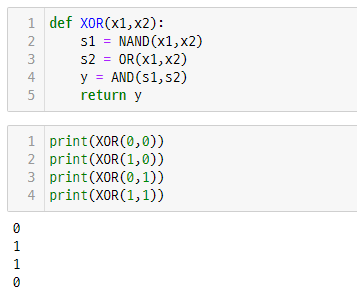

이거 푼거랑 똑같은 논리로 접근 하면 돼!

In [114]:
class XOR():
    def __init__(self):
        np.random.seed(1)
        
        #2층 신경망의 매개변수
        def weight_init():
            params = {}
            params['W1'] = np.random.randn(2)
            params['b1'] = np.random.rand(2)
            params['W2'] = np.random.randn(2)
            params['b2'] = np.random.rand(1)
            return params
        
        self.params = weight_init()
        
    def predict(self,x):
        W1,W2 = self.params['W1'].reshape(-1,1), self.params['W2'].reshape(-1,1)
        b1,b2 = self.params['b1'], self.params['b2']
        
        A1 = np.dot(x,W1) + b1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1,W2) + b2
        pred_y = sigmoid(A2)
        
        return pred_y
    
    def loss(self,x,true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
    
    def get_gradient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
        
        grads = {}
        grads['W1'] = differential(loss_grad, self.params['W1'])
        grads['b1'] = differential(loss_grad, self.params['b1'])
        grads['W2'] = differential(loss_grad, self.params['W2'])
        grads['b2'] = differential(loss_grad, self.params['b2'])
        
        return grads

In [115]:
XOR = XOR()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y4 = np.array([[0],[1],[1],[0]])

train_loss_list5 = list()

for i in range(epochs):
    grads = XOR.get_gradient(X,Y4)
    
    for key in ['W1','b1','W2','b2']:
        XOR.params[key] -= lr*grads[key]
        
    loss = XOR.loss(X,Y4)
    train_loss_list5.append(loss)
    
    if i%100 ==99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1, loss, AND.weights, AND.bias))   

Epochs : 100, Cost : 1.3735671088815753, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 200, Cost : 1.3651207639926013, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 300, Cost : 1.353442133114538, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 400, Cost : 1.3368594082199925, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 500, Cost : 1.3137221263821095, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 600, Cost : 1.2822263227992128, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 700, Cost : 1.2366196689828508, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 800, Cost : 1.1394214854008515, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 900, Cost : 0.888854116541407, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 1000, Cost : 0.6256077807762299, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]


In [116]:
XOR.predict(X)

array([[0.2609618 ],
       [0.7639633 ],
       [0.68281861],
       [0.25773454]])

#### 학습률 조정

In [117]:
lr = 0.3

for i in range(epochs):
    grads = XOR.get_gradient(X,Y4)
    
    for key in ['W1','b1','W2','b2']:
        XOR.params[key] -= lr*grads[key]
        
    loss = XOR.loss(X,Y4)
    train_loss_list5.append(loss)
    
    if i%100 ==99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1, loss, AND.weights, AND.bias))   

Epochs : 100, Cost : 0.26423816180460497, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 200, Cost : 0.15472193951681867, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 300, Cost : 0.10712110936785606, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 400, Cost : 0.08124302351322064, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 500, Cost : 0.0651692042852715, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 600, Cost : 0.05428045337331503, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 700, Cost : 0.04644351003527885, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 800, Cost : 0.040545985198490495, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 900, Cost : 0.035953989738723505, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]
Epochs : 1000, Cost : 0.03228103535893161, Weights : [4.27548114 4.27284863], Bias : [-6.6027234]


In [118]:
XOR.predict(X)

array([[0.01437328],
       [0.97911594],
       [0.98563516],
       [0.0144055 ]])

### 4.5.3 MNIST 2층 신경망 구현하기

지난번엔 우리가 '이미 학습된 데이터(pre-trained data)'를 가져다가 MNIST를 학습을 시켰었잖아<br>
오늘은 직접! 훈련까지 시켜볼거야

신경망 학습의 순서는 다음과 같아<br>
1. 미니배치
2. 기울기 산출
3. 매개변수 갱신
4. 1~3 반복

훈련데이터중 일부를 뽑아온 애를 미니배치라 했어. 얘의 손실함수를 줄이는게 목표야 (전체의 손실함수를 한번에 다 줄이려는게 아니야!)
이때, '일부'를 뽑는다고 했잖아? 그리고 얘한테 '경사하강법'을 적용할꺼잖아?<br>
그래서 얘를, <b>'확률적 경사 하강법'(Stochastic Gradient Descent)</b> 라고 해

### 데이터 불러오기

In [203]:
#나도 힘들어. 그냥 불러서 쓸거야
import os, sys
os.getcwd()
sys.path.append('D:\python_projects\python_practice\deep_scratch_01\deep-learning-from-scratch-master')

#
# deep-learning-from-scratch-master라는 폴더를 찾아
# 경로를 복사해
# sys.path.append 뒤에 붙여넣으렴


In [155]:
from dataset.mnist import load_mnist

In [156]:
(x_train,y_train),(x_test,y_test) = load_mnist(normalize = True, flatten = True, one_hot_label = True)

### 하이퍼 파라미터

In [162]:
epochs = 100
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]
print(train_size)

60000


### 사용할 함수

In [159]:
#위에있는거랑 겹치는 부분이 많아

def sigmoid(x):
    return 1/(1+np.exp(-x))

def mean_squared_error(pred_y,true_y):
    return 0.5 * np.sum((true_y - pred_y)**2 )

def cross_entropy_error(pred_y, true_y):
    if true_y.ndim==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y,true_y):
    if true_y.ndim ==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
  
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta)) /batch_size

def cross_entropy_error_for_bin(pred_y,true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1-pred_y)))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
       
    return grad

def numerical_gradient(f, X):
    if X.ndim ==1:
        return numerical_gradient_1d(f,X)
    
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_1d(f,x)
            
        return grad

In [164]:
class two_layer():
    def __init__(self):
        
        def weight_init(input,hidden,output):
            np.random.seed(1)
            params = {}
            params['W1'] = 0.01 * np.random.randn(input,hidden)
            params['b1'] = np.zeros(hidden)
            params['W2'] = 0.01 * np.random.randn(hidden,output)
            params['b2'] = np.zeros(output)
            
            return params
        
        self.params = weight_init(784,64,10)
        
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        A1 = np.dot(x,W1) + b1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1,W2) + b2
        pred_y = softmax(A2)
        
        return pred_y
    
    def loss(self,x,true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y,true_y)
    
    def accuracy(self,x,true_y):
        pred_y = self.predict(x)
        y_argmax = np.argmax(pred_y, axis = 1)
        t_argmax = np.argmax(true_y, axis = 1)
        
        accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])
        
        return accuracy
    
    def get_gradient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_grad,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_grad,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_grad,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_grad,self.params['b2'])
        
        return grads

In [165]:
model = two_layer()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size/batch_size,1)

start_time = time.time()
for i in tqdm(range(epochs)):
    
    batch_idx = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_idx]
    y_batch = y_train[batch_idx]
    
    grads = model.get_gradient(x_batch,y_batch)
    
    for key in grads.keys():
        model.params[key] -= lr * grads[key]
        
    loss = model.loss(x_batch,y_batch)
    train_loss_list.append(loss)
    
    train_accuracy = model.accuracy(x_train,y_train)
    test_accuracy = model.accuracy(x_test,y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    
    print('Epoch : {}, Cost : {}, Train Accuracy : {}, Test Accuracy : {}'.format(i+1, loss, train_accuracy, test_accuracy))
    
end_time = time.time()
print('learning time : {:3f}s'.format(end_time - start_time))

Epoch : 1, Cost : 402.8164838421469, Train Accuracy : 0.09871666666666666, Test Accuracy : 0.098
Epoch : 2, Cost : 371.57567905511667, Train Accuracy : 0.09736666666666667, Test Accuracy : 0.0982
Epoch : 3, Cost : 354.12208413052724, Train Accuracy : 0.10126666666666667, Test Accuracy : 0.1027
Epoch : 4, Cost : 352.2199661695997, Train Accuracy : 0.10221666666666666, Test Accuracy : 0.101
Epoch : 5, Cost : 346.23202071921105, Train Accuracy : 0.10411666666666666, Test Accuracy : 0.1027
Epoch : 6, Cost : 347.68277491597735, Train Accuracy : 0.09946666666666666, Test Accuracy : 0.0988
Epoch : 7, Cost : 352.57694522799136, Train Accuracy : 0.09765, Test Accuracy : 0.1005
Epoch : 8, Cost : 348.12490008726587, Train Accuracy : 0.10136666666666666, Test Accuracy : 0.1035
Epoch : 9, Cost : 345.65574279364773, Train Accuracy : 0.10428333333333334, Test Accuracy : 0.1
Epoch : 10, Cost : 340.8321878450173, Train Accuracy : 0.09751666666666667, Test Accuracy : 0.0974
Epoch : 11, Cost : 342.744678

Epoch : 88, Cost : 288.7753458727649, Train Accuracy : 0.5432, Test Accuracy : 0.5437
Epoch : 89, Cost : 302.61241215699783, Train Accuracy : 0.5399, Test Accuracy : 0.5408
Epoch : 90, Cost : 283.96032104154955, Train Accuracy : 0.6251666666666666, Test Accuracy : 0.6211
Epoch : 91, Cost : 284.87820066264374, Train Accuracy : 0.66715, Test Accuracy : 0.6617
Epoch : 92, Cost : 276.0302408935228, Train Accuracy : 0.68755, Test Accuracy : 0.6888
Epoch : 93, Cost : 282.76912897609685, Train Accuracy : 0.7214833333333334, Test Accuracy : 0.7189
Epoch : 94, Cost : 270.8816176076607, Train Accuracy : 0.74785, Test Accuracy : 0.7544
Epoch : 95, Cost : 275.7640755414362, Train Accuracy : 0.7497333333333334, Test Accuracy : 0.7441
Epoch : 96, Cost : 267.16212811279706, Train Accuracy : 0.76365, Test Accuracy : 0.7617
Epoch : 97, Cost : 274.52023678670804, Train Accuracy : 0.7708, Test Accuracy : 0.7675
Epoch : 98, Cost : 293.99088361624274, Train Accuracy : 0.5806833333333333, Test Accuracy : 0.